Observations:

1.Urban areas have the highest value for each parameter studied(obviously more people live in urban areas.

2.The % total rides in Rural areas is larger than the % totals drivers in rural areas which means that they are giving more rides per capita than Suburban areas.

3.Furthermore, the % of Total fares in Rural areas occupies the largest portion of the pie among the three parameters which means their average fair was more expensive due to high rates, or longer distances. Both of these assumptions make sense for Rural areas and their uber's.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


city_load = 'raw_data/city_data.csv'
ride_load = 'raw_data/ride_data.csv'

city_data = pd.read_csv(city_load)
ride_data = pd.read_csv(ride_load)

cr_data = pd.merge(city_data, ride_data, on='city')
cr_data.head(10)


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [4]:
#Seperate Urban data from dataset and define three variables using Panadas functions
urban_cities = cr_data[cr_data['type']=='Urban']
u_ridecount = urban_cities.groupby(['city']).count()['ride_id']
u_avgfare = urban_cities.groupby(["city"]).mean()['fare']
u_drivercount = urban_cities.groupby(["city"]).mean()['driver_count']

#Seperate Suburban data from dataset and define three variables using Panadas functions
suburban_cities = cr_data[cr_data['type']=='Suburban']
s_ridecount = suburban_cities.groupby(['city']).count()['ride_id']
s_avgfare = suburban_cities.groupby(['city']).mean()['fare']
s_drivercount = suburban_cities.groupby(['city']).mean()['driver_count']

#Seperate Rural data from dataset and define three variables using Panadas functions
rural_cities = cr_data[cr_data['type']=='Rural']
r_ridecount = rural_cities.groupby(["city"]).count()["ride_id"]
r_avgfare = rural_cities.groupby(["city"]).mean()["fare"]
r_drivercount = rural_cities.groupby(["city"]).mean()["driver_count"]
# s_ridecount
# u_avgfare 
# u_drivercount
# test = cr_data.loc[cr_data['city']=='Karenside']
# test


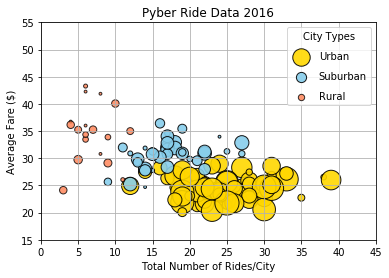

In [16]:
#Create Scatter Plot for Average Ride Cost vs Total Rides per City for Urban Areas
plt.scatter(u_ridecount, u_avgfare, 
            s=8*u_drivercount, c='gold', edgecolor='black', linewidths=1, marker='o', 
            alpha=0.9, label='Urban')

#Create Scatter Plot for Average Ride Cost vs Total Rides per City for Suburban Areas
plt.scatter(s_ridecount, s_avgfare, 
            s=8*s_drivercount, c='skyblue', edgecolor='black', linewidths=1, marker='o', 
            alpha=0.9, label='Suburban')

#Create Scatter Plot for Average Ride Cost vs Total Rides per City for Rural Areas
plt.scatter(r_ridecount, r_avgfare, 
            s=8*r_drivercount, c='coral', edgecolor='black', linewidths=1, marker='o', 
            alpha=0.8, label='Rural')

#Scatter Plot Beautification 
plt.title('Pyber Ride Data 2016')
plt.xlabel('Total Number of Rides/City', fontsize='medium')
plt.ylabel('Average Fare ($)', fontsize='medium')
plt.xlim((0,45))
plt.ylim((15,55))

plt.grid()

key = plt.legend(fontsize='medium', loc='best', title='City Types', labelspacing=1.0)
key.legendHandles[0]
key.legendHandles[1]
key.legendHandles[2]

plt.savefig('analysis/Fig1.png')

plt.show()

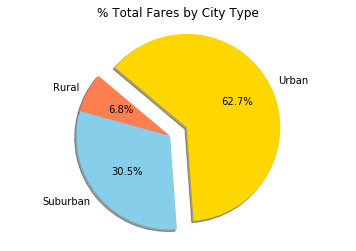

In [6]:
#Use columns in dataframe to compute % of fares by city type
type_percent = 100 * cr_data.groupby(['type']).sum()['fare'] / cr_data['fare'].sum()

#Create Pie chart comparing % of ride by city type
plt.pie(type_percent, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['coral', 'skyblue', 'gold'], 
        explode=[0, 0, 0.2], 
        autopct='%1.1f%%', 
        shadow=True, startangle=140)
plt.title('% Total Fares by City Type')
plt.axis('equal')


plt.savefig('analysis/Fig2.png')
plt.show()

TypeError: 'str' object is not callable

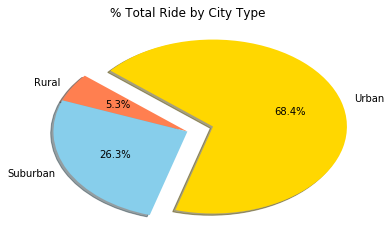

In [15]:
#Use columns in dataframe to compute % of fares by city type
type_percent = 100 * cr_data.groupby(['type']).count()['ride_id'] / cr_data['ride_id'].count()

# Build Pie Chart
plt.pie(type_percent, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['coral', 'skyblue', 'gold'], 
        explode=[0, 0, 0.2], 
        autopct='%1.1f%%', 
        shadow=True, startangle=140)
plt.title('% Total Ride by City Type')
plt.axis('equal')

plt.savefig('analysis/Fig3.png')
plt.show()

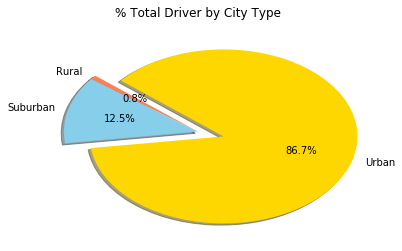

In [9]:
#Use columns in dataframe to compute % of driver by city type
driver_percent = 100 * cr_data.groupby(['type']).sum()['driver_count'] / city_data['driver_count'].sum()

# Build Pie Chart
plt.pie(driver_percent, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['coral', 'skyblue', 'gold'], 
        explode=[0, 0, 0.2], 
        autopct='%1.1f%%', 
        shadow=True, startangle=140)
plt.title('% Total Driver by City Type')
plt.axis='equal'

plt.savefig('analysis/Fig4.png')
plt.show()